# LeNet Lab
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [1]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/")
X_train, y_train = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.train.images, mnist.train.labels
X_test, y_test   = mnist.test.images, mnist.test.labels

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

0


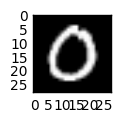

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index]

# Reshape MNIST image from vector to matrix
image = np.reshape(image, (28, 28))

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [3]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [4]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 50

## TODO: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
An MNIST image is initially 784 features (1D). We reshape this to (28, 28, 1) (3D), normalize such that the values are between 0-1 instead of 0-255, and finally, pad the image with 0s, such that the height and width are 32 (centers digit further). Thus, the input shape going into the first convolutional layer is 32x32x1.

### Architecture
**Convolutional Layer 1.** The output shape should be 28x28x6.

**Activation 1.** Your choice of activation function.

**Pooling Layer 1.** The output shape should be 14x14x6.

**Convolutional Layer 2.** The output shape should be 10x10x16.

**Activation 2.** Your choice of activation function.

**Pooling Layer 2.** The output shape should be 5x5x16.

**Flatten Layer.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Fully Connected Layer 1.** This should have 120 outputs.

**Activation 3.** Your choice of activation function.

**Fully Connected Layer 2 (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [5]:
from tensorflow.contrib.layers import flatten

def weights(shape, stddev=0.05):
    return tf.Variable(tf.truncated_normal(shape=shape, stddev=stddev))


def bias(shape, value=0.05):
    return tf.Variable(tf.constant(value=value, shape=shape))


def conv2d(input, filters_size, num_filters, input_depth, padding='VALID', strides=[1, 1, 1, 1]):

    W = weights([filters_size, filters_size, input_depth, num_filters])  # filters
    b = bias([num_filters])  # bias

    return tf.nn.conv2d(input, W, padding=padding, strides=strides) + b


def relu(layer):
    return tf.nn.relu(layer)


def max_pool(layer, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME'):
    return tf.nn.max_pool(layer, ksize=ksize, strides=strides, padding=padding)


def fully_connected(x, num_inputs, num_outputs):
    W = weights([num_inputs, num_outputs])
    b = bias([num_outputs])
    return tf.matmul(x, W) + b

def LeNet(x):
    # Reshape from 2D to 4D. This prepares the data for
    # convolutional and pooling layers.
    x = tf.reshape(x, (-1, 28, 28, 1))
    # Pad 0s to 32x32. Centers the digit further.
    # Add 2 rows/columns on each side for height and width dimensions.
    x = tf.pad(x, [[0, 0], [2, 2], [2, 2], [0, 0]], mode="CONSTANT")
    
    first_conv_stack = max_pool(relu(conv2d(x, filters_size=5, input_depth=1, num_filters=6)))

    second_conv_stack = max_pool(relu(conv2d(first_conv_stack, filters_size=5, input_depth=6, num_filters=16)))

    flatten_layer = tf.reshape(second_conv_stack, [-1, 400])

    first_fully_connected = fully_connected(flatten_layer, 400, 120)

    second_fully_connected = fully_connected(first_fully_connected, 120, 10)

    return second_fully_connected

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

Each MNIST image is a 28x28x1 grayscale representation of a digit. So the length of an "unrolled" MNIST image vector is **784** (28x28x1=784), and the number of classes in the label set is **10**.

You do not need to modify this section.

In [6]:
x = tf.placeholder(tf.float32, (None, 784))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 10)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [7]:
logits = LeNet(x)
loss_operation = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y))
optimizer = tf.train.AdamOptimizer()
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Model Evaluation
Evaluate how well the model classifies a batch of data.

If the number of examples in the dataset is not evenly divisible by the batch size, this implementation ignores the remainder. This is fine for large datasets.

You do not need to modify this section.

In [8]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy, total_loss = 0, 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy =  sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * batch_x.shape[0])
        total_loss     += (loss * batch_x.shape[0])
    return total_loss / num_examples, total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            loss = sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_loss, validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Loss     = {:.3f}".format(validation_loss))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Loss     = 0.080
Validation Accuracy = 0.976

EPOCH 2 ...
Validation Loss     = 0.064
Validation Accuracy = 0.981

EPOCH 3 ...
Validation Loss     = 0.046
Validation Accuracy = 0.985

EPOCH 4 ...
Validation Loss     = 0.038
Validation Accuracy = 0.988

EPOCH 5 ...
Validation Loss     = 0.029
Validation Accuracy = 0.991

EPOCH 6 ...
Validation Loss     = 0.026
Validation Accuracy = 0.992

EPOCH 7 ...
Validation Loss     = 0.023
Validation Accuracy = 0.993

EPOCH 8 ...
Validation Loss     = 0.029
Validation Accuracy = 0.990

EPOCH 9 ...
Validation Loss     = 0.026
Validation Accuracy = 0.991

EPOCH 10 ...
Validation Loss     = 0.015
Validation Accuracy = 0.995

Model saved


## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [10]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    test_loss, test_accuracy = evaluate(X_test, y_test)
    print("Test Loss     = {:.3f}".format(test_loss))
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Loss     = 0.040
Test Accuracy = 0.988
